<a href="https://colab.research.google.com/github/karthicreddyy/Datascience/blob/main/Fashion_MNIST_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras 

In [2]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from keras.utils.np_utils import to_categorical

In [3]:
from keras.models import Sequential
from tensorflow.keras import optimizers
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.layers import BatchNormalization, Dropout

In [5]:
train = pd.read_csv('/content/train.csv')

In [7]:
test = pd.read_csv('/content/test.csv')

In [8]:
train.head()

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0


In [9]:
test.head()

,id
0,60001
1,60002
2,60003
3,60004
4,60005


In [11]:
##lookup = pd.read_csv(r"C:\Users\mailk\OneDrive\Desktop\AI and ML\Deep Learning\AV Apparel Hack\apparel_lookup.csv")

In [14]:
lookup

NameError: ignored

In [15]:
train.shape

(60000, 2)

In [16]:
from keras.datasets import fashion_mnist

In [17]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [18]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [19]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

0


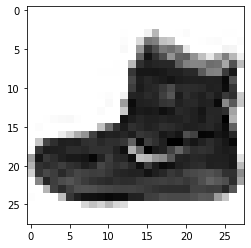

1


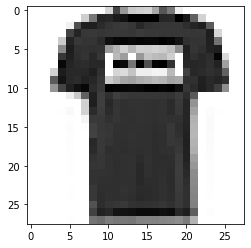

2


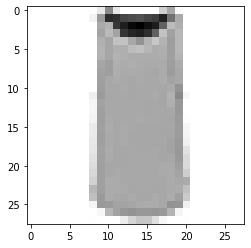

3


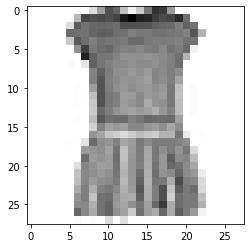

4


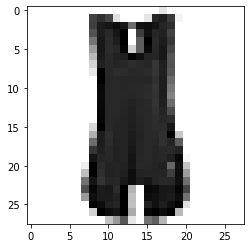

In [20]:
for i in range(5):
    print(i)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
    plt.show()

In [21]:
X_train = tf.keras.utils.normalize(X_train, axis=1)

In [22]:
X_test = tf.keras.utils.normalize(X_test, axis=1)

0


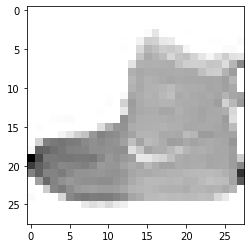

1


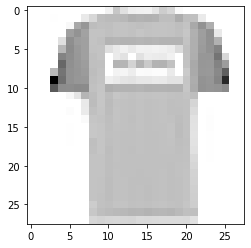

2


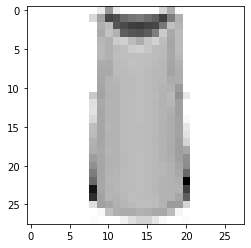

3


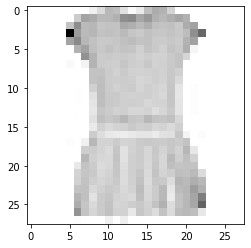

4


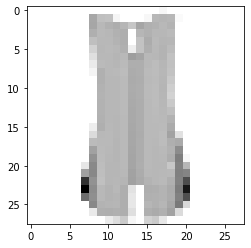

In [23]:
for i in range(5):
    print(i)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
    plt.show()

### Build Models

In [24]:
model = tf.keras.models.Sequential()

In [25]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [27]:
model.fit(X_train, y_train, epochs=15, validation_split=0.3, verbose=1)

Epoch 1/15
1313/1313 [==============================] - 9s 5ms/step - loss: 0.8436 - accuracy: 0.7209 - val_loss: 0.5343 - val_accuracy: 0.8049
Epoch 2/15
1313/1313 [==============================] - 6s 4ms/step - loss: 0.4936 - accuracy: 0.8240 - val_loss: 0.4641 - val_accuracy: 0.8318
Epoch 3/15
1313/1313 [==============================] - 6s 4ms/step - loss: 0.4411 - accuracy: 0.8415 - val_loss: 0.4348 - val_accuracy: 0.8408
Epoch 4/15
1313/1313 [==============================] - 6s 4ms/step - loss: 0.4117 - accuracy: 0.8521 - val_loss: 0.4084 - val_accuracy: 0.8530
Epoch 5/15
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3897 - accuracy: 0.8609 - val_loss: 0.3953 - val_accuracy: 0.8563
Epoch 6/15
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3726 - accuracy: 0.8665 - val_loss: 0.3885 - val_accuracy: 0.8609
Epoch 7/15
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3592 - accuracy: 0.8707 - val_loss: 0.3838 - val_accuracy:

In [28]:
val_loss, val_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3654 - accuracy: 0.8680


In [29]:
print('val loss:', val_loss, '\nval acc:', val_acc)

val loss: 0.3653879761695862 
val acc: 0.8679999709129333


In [30]:
test_pred = model.predict(X_test)

In [31]:
y_test[1]

2

In [32]:
np.argmax(test_pred[1])

2

In [33]:
confusion = confusion_matrix(y_test, np.argmax(model.predict(X_test),axis=1))

In [34]:
confusion

array([[832,   3,   7,  30,   3,   1, 110,   0,  14,   0],
       [  7, 958,   2,  20,   7,   0,   5,   0,   1,   0],
       [ 11,   1, 704,   7, 177,   0,  95,   0,   5,   0],
       [ 29,  11,   6, 866,  50,   0,  33,   0,   5,   0],
       [  0,   1,  62,  28, 850,   0,  55,   0,   4,   0],
       [  0,   0,   0,   1,   0, 966,   0,  21,   1,  11],
       [131,   4,  75,  25, 101,   0, 645,   0,  19,   0],
       [  0,   0,   0,   0,   0,  22,   0, 945,   0,  33],
       [  3,   1,   0,   5,   6,   4,  13,   5, 963,   0],
       [  0,   0,   0,   0,   0,  10,   1,  37,   1, 951]])

In [35]:
pred_array = np.argmax(model.predict(X_test),axis=1)

In [36]:
pred_array

array([9, 2, 1, ..., 8, 1, 5])

In [37]:
test['label'] = pred_array

In [38]:
test

,id,label
0,60001,9
1,60002,2
2,60003,1
3,60004,1
4,60005,6
...,...,...
9995,69996,9
9996,69997,1
9997,69998,8
9998,69999,1


In [39]:
##test.to_csv(r'C:\Users\mailk\OneDrive\Desktop\AI and ML\Deep Learning\AV Apparel Hack\submit2.csv', index=False)

In [40]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [41]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

## CNN

In [42]:
def deep_cnn_advanced_nin():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model 

In [43]:
model = deep_cnn_advanced_nin()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 50)        500       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 50)       200       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 50)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 50)        22550     
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 25)        1275      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 25)       100       
 hNormalization)                                      

In [53]:
model_history = model.fit(X_train, Y_train  , batch_size=1000, validation_split=0.2, epochs=15, verbose = 1)

Epoch 1/15
48/48 [==============================] - 12s 198ms/step - loss: 0.2208 - accuracy: 0.9223 - val_loss: 0.2228 - val_accuracy: 0.9188
Epoch 2/15
48/48 [==============================] - 9s 196ms/step - loss: 0.2051 - accuracy: 0.9280 - val_loss: 0.2185 - val_accuracy: 0.9207
Epoch 3/15
48/48 [==============================] - 9s 195ms/step - loss: 0.1978 - accuracy: 0.9316 - val_loss: 0.2170 - val_accuracy: 0.9202
Epoch 4/15
48/48 [==============================] - 9s 195ms/step - loss: 0.1922 - accuracy: 0.9333 - val_loss: 0.2226 - val_accuracy: 0.9188
Epoch 5/15
48/48 [==============================] - 9s 195ms/step - loss: 0.1861 - accuracy: 0.9341 - val_loss: 0.2190 - val_accuracy: 0.9212
Epoch 6/15
48/48 [==============================] - 9s 196ms/step - loss: 0.1833 - accuracy: 0.9364 - val_loss: 0.2200 - val_accuracy: 0.9194
Epoch 7/15
48/48 [==============================] - 9s 195ms/step - loss: 0.1773 - accuracy: 0.9377 - val_loss: 0.2223 - val_accuracy: 0.9212
Epoch

In [54]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.2521 - accuracy: 0.9190


[0.2521238327026367, 0.9190000295639038]

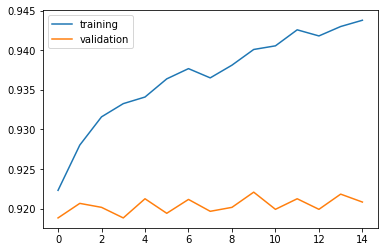

In [55]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(['training','validation'])


In [56]:
pred_array = np.argmax(model.predict(X_test),axis=1)

In [57]:
pred_array

array([9, 2, 1, ..., 8, 1, 5])

In [58]:
test['label'] = pred_array

In [61]:
test.to_csv('/content/CNN_Submit1.csv', index=False)